### Задание №1

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [52]:
from sklearn.datasets import load_boston

In [53]:
boston = load_boston()

In [54]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [55]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [56]:
data = boston.data

In [57]:
feature_names = boston.feature_names

In [58]:
X = pd.DataFrame(data, columns=feature_names)

In [59]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [61]:
price = boston.target

In [62]:
y = pd.DataFrame(price, columns=['price'])

In [63]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [64]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()

In [70]:
X_train_scaled = scaler.fit_transform(X_train)

In [71]:
X_test_scaled = scaler.fit_transform(X_test)

In [72]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [73]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [74]:
from sklearn.manifold import TSNE

In [75]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [76]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [77]:
X_train_tsne

array([[ 1.81041489e+01,  2.91841412e+01],
       [ 3.36446118e+00, -7.90966845e+00],
       [-2.07167511e+01, -8.94725513e+00],
       [ 2.76545868e+01,  2.66364594e+01],
       [ 4.35941935e+00, -7.43922949e+00],
       [-1.18708668e+01, -3.19696522e+00],
       [-9.88421822e+00, -3.11915612e+00],
       [-2.67814331e+01, -1.50311155e+01],
       [ 2.85059834e+01,  2.74729290e+01],
       [ 2.97867966e+01,  2.44989853e+01],
       [-1.03291616e+01, -2.70374441e+00],
       [-6.06545353e+00, -9.15262985e+00],
       [-5.61790419e+00, -1.35841761e+01],
       [ 2.86210976e+01,  2.46200790e+01],
       [-7.11505461e+00, -1.45416355e+01],
       [ 7.49843025e+00, -8.60527611e+00],
       [ 1.22831607e+00, -5.80473423e+00],
       [-2.18536625e+01, -8.58939934e+00],
       [-1.68641014e+01, -1.03258257e+01],
       [-1.86876888e+01, -6.71250486e+00],
       [ 2.41089859e+01,  2.88961773e+01],
       [-7.64432192e-01, -5.37148428e+00],
       [-1.35651073e+01, -3.63450623e+00],
       [-8.

In [78]:
X_train_tsne.shape

(404, 2)

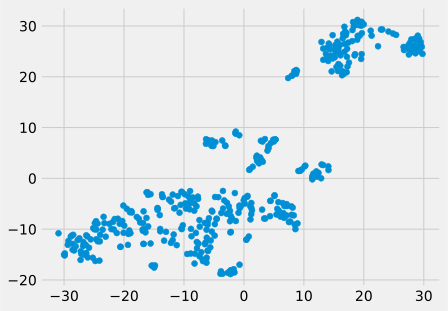

In [79]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание №2

In [80]:
from sklearn.cluster import KMeans

In [81]:
kmeans = KMeans(n_clusters=3,max_iter=100, random_state=42)

In [82]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [83]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

Text(15, 15, 'Кластер 2')

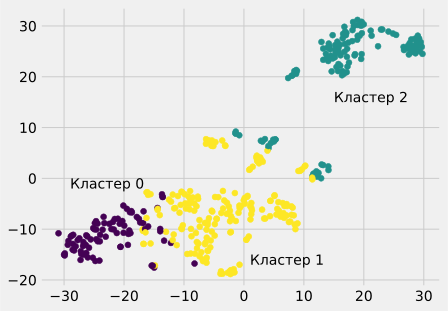

In [84]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-29, -2, 'Кластер 0')
plt.text(1, -17, 'Кластер 1')
plt.text(15, 15, 'Кластер 2')

In [85]:
y_train.mean()

price    22.796535
dtype: float64

In [86]:
y_train[labels_train==0].mean()

price    27.788372
dtype: float64

In [87]:
y_train[labels_train==1].mean()

price    16.165354
dtype: float64

In [88]:
y_train[labels_train==2].mean()

price    24.958115
dtype: float64

In [89]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534884

In [90]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196851

In [91]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.4216602094240837